# Feature Scaling

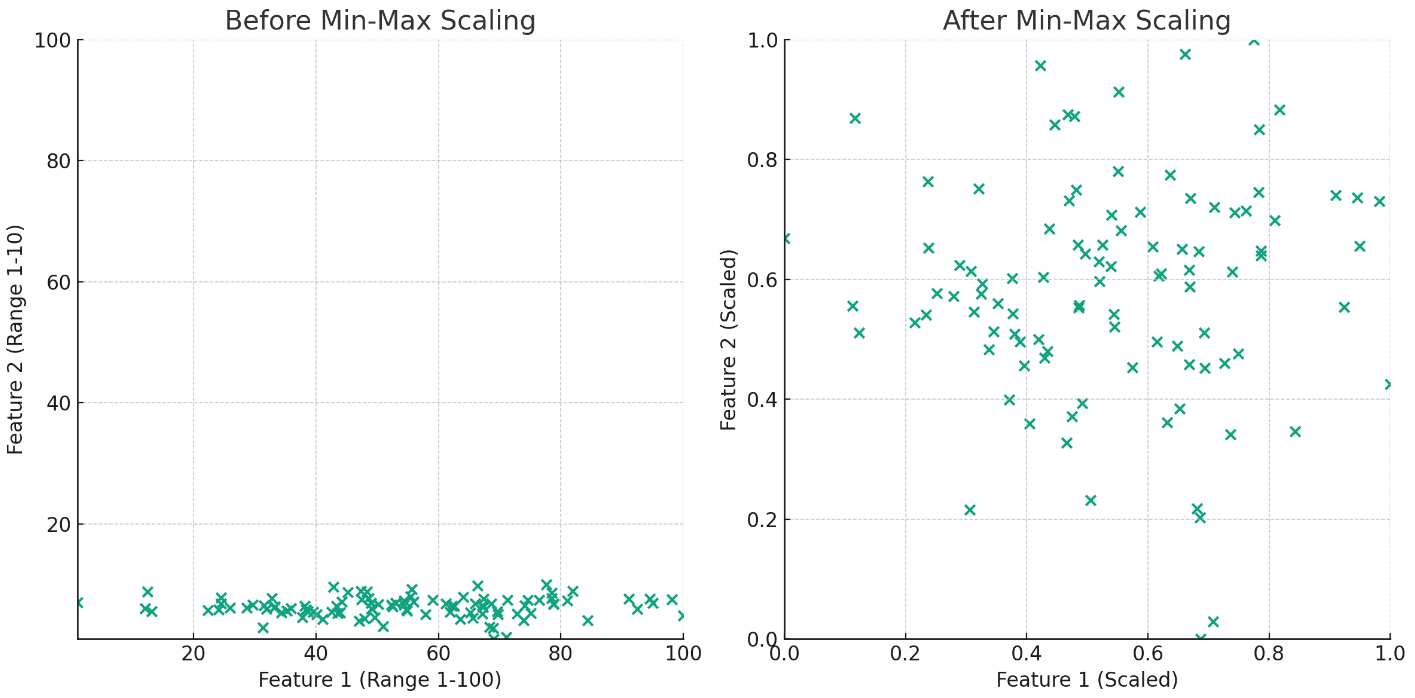

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, _ = make_regression(n_samples=100, n_features=2, noise=0.1)

# Scale feature 1 to range 1-100, feature 2 to range 1-10
X[:, 0] = 1 + 99 * (X[:, 0] - X[:, 0].min()) / (X[:, 0].max() - X[:, 0].min())
X[:, 1] = 1 + 9 * (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min())
df_before_scaling = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
# Display the DataFrames
df_before_scaling

,Feature 1,Feature 2
0,77.285588,2.063982
1,92.002858,6.152827
2,84.107489,6.833563
3,24.804985,5.080666
4,88.702805,5.368379
...,...,...
95,52.545472,6.061843
96,46.817997,7.825007
97,47.624129,6.607021
98,1.000000,5.368303


In [16]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the numpy arrays to pandas DataFrames
df_after_scaling = pd.DataFrame(X_scaled, columns=['Feature 1', 'Feature 2'])

df_after_scaling

,Feature 1,Feature 2
0,0.573534,0.533425
1,0.424300,0.404138
2,1.000000,0.520249
3,0.513264,0.382975
4,0.677743,0.767421
...,...,...
95,0.206794,0.298254
96,0.379119,0.539349
97,0.396282,0.457780
98,0.795396,0.788963


## Min-Max Scaling 
$$x_j'^{(i)} = \frac{x_j^{(i)} - \min(x_j)}{\max(x_j) - \min(x_j)}$$

## Standard Scaling
$$x_j'^{(i)} = \frac{x_j^{(i)} - \mu(x_j)}{\sigma(x_j)}$$

In [21]:
titanic_data = pd.read_csv("titanic-train.csv")

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
from sklearn.model_selection import train_test_split

In [29]:
titanic_data = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
train_data, test_data = train_test_split(titanic_data, test_size=0.3, random_state=42)

In [30]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [31]:
train_data

,Pclass,Age,SibSp,Parch,Fare
445,1,4.0,0,2,81.8583
650,3,28.0,0,0,7.8958
172,3,1.0,1,1,11.1333
450,2,36.0,1,2,27.7500
314,2,43.0,1,1,26.2500
...,...,...,...,...,...
106,3,21.0,0,0,7.6500
270,1,28.0,0,0,31.0000
860,3,41.0,2,0,14.1083
435,1,14.0,1,2,120.0000


In [41]:
scaler = StandardScaler()

In [42]:
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[-1.63788124, -1.91971935, -0.47416141,  1.99885349,  0.98099823],
       [ 0.80326712, -0.0772525 , -0.47416141, -0.47932706, -0.46963364],
       [ 0.80326712, -2.15002771,  0.34868694,  0.75976322, -0.40613632],
       ...,
       [ 0.80326712,  0.92075038,  1.17153529, -0.47932706, -0.34778742],
       [-1.63788124, -1.15202483,  0.34868694,  1.99885349,  1.72907416],
       [-1.63788124, -0.61463866, -0.47416141,  0.75976322,  0.8913508 ]])

In [39]:
test_data_scaled = scaler.transform(test_data)

In [40]:
test_data_scaled

array([[ 0.80326712, -0.0772525 ,  0.34868694,  0.75976322, -0.32547755],
       [-0.41730706,  0.15305586, -0.47416141, -0.47932706, -0.41855727],
       [ 0.80326712, -0.69140812, -0.47416141, -0.47932706, -0.46906094],
       ...,
       [-1.63788124,  2.76321724, -0.47416141, -0.47932706, -0.10376746],
       [ 0.80326712, -0.92171647, -0.47416141, -0.47932706, -0.45459629],
       [-1.63788124, -0.0772525 , -0.47416141, -0.47932706, -0.10376746]])